**Holdout validation with random assignment**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Tamaño de X: (60000, 28, 28)
Tamaño de y: (60000,)
Tamaño de x_test_: (10000, 28, 28)
Tamaño de y_test_: (10000,)


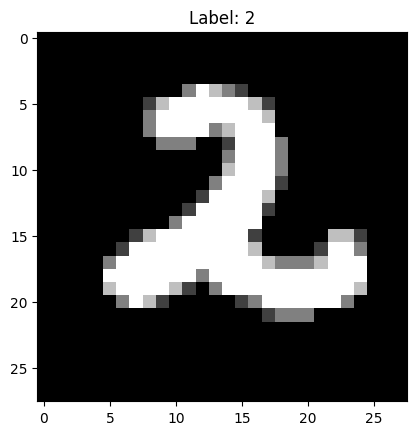

In [3]:
# The MNIST database is loaded:
(X, y),(x_test_,y_test_) = mnist.load_data()

# The size of the training and test data is printed:
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
print("Tamaño de x_test_:",x_test_.shape)
print("Tamaño de y_test_:", y_test_.shape)

# A random image of the training set is displayed:
rand_index = np.random.randint(0, X.shape[0])
plt.imshow(X[rand_index], cmap="gray")
plt.title("Label: {}".format(y[rand_index]))
plt.show()

# Training and validation images are vectorized:
X=np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))

# The data set is normalized:
X=X/255

In [4]:
# Para probar la validación holdout aleatória se hará con el modelo K-NN.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

nreps=3 #Number of reps of the experiment

# A K-NN model is created and fitted with the training data:

k=3
knn_model= KNeighborsClassifier(n_neighbors=k)

accuracy=np.empty((nreps))

for i in range(nreps):

  #The data set is splited with a 75% of  records for training and for testing the 25%.
  #It is determined by test_size variable.

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
  if i==0:
    print('Tamaño del conjunto de entrenamiento:', X_train.shape)
    print('Tamaño del conjunto de validación:', X_test.shape)

  #The k-nn model is trained:
  knn_model.fit(X_train, y_train)


  # Validation:
  # The K-NN model is used to make prediction on the test data:
  predictions = knn_model.predict(X_test)

  # The performance of the K-nn model is evaluated
  acc=(accuracy_score(y_test, predictions))
  print(f'Accuracy iteration {i+1} K-NN model : {acc}')
  accuracy[i]=acc

acc_prom = accuracy.mean()
acc_std  = accuracy.std()

print('Average Accuracy:',acc_prom*100)
print('Standard deviation of the accurracy:',acc_std*100)


Tamaño del conjunto de entrenamiento: (45000, 784)
Tamaño del conjunto de validación: (15000, 784)
Accuracy iteration 1 K-NN model : 0.97
Accuracy iteration 2 K-NN model : 0.9722666666666666
Accuracy iteration 3 K-NN model : 0.9696666666666667
Average Accuracy: 97.06444444444445
Standard deviation of the accurracy: 0.11551281260770457
